In [11]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
# Any import of metpy will activate the accessors
from metpy.cbook import get_test_data

In [17]:
ds = xr.open_dataset("cru_tmp_1901-2020_EHF.nc")
data_var = ds.metpy.parse_cf('tmp')
#ds #data explore
data_var # variables explore

<xarray.DataArray 'tmp' (time: 1440, lat: 20, lon: 30)>
[864000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
  * lon        (lon) float32 85.25 85.75 86.25 86.75 ... 98.25 98.75 99.25 99.75
  * lat        (lat) float32 20.25 20.75 21.25 21.75 ... 28.25 28.75 29.25 29.75
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [19]:
y = data_var.lat #reading lattitudes
x = data_var.lon #reading longitude
#select variables at timestep
im_data = data_var.isel(time=0)#.sel(isobaric=1000.)
im_data

<xarray.DataArray 'tmp' (lat: 20, lon: 30)>
array([[ 20.6     ,  21.2     ,  21.4     , ...,  18.300001,  17.9     ,
         19.2     ],
       [ 19.9     ,  20.7     ,  20.9     , ...,  18.4     ,  17.7     ,
         17.7     ],
       [ 19.      ,  18.5     ,  19.5     , ...,  16.800001,  16.4     ,
         14.5     ],
       ...,
       [-17.300001, -14.8     , -16.2     , ...,  -4.8     ,   0.      ,
         -5.      ],
       [-14.1     , -13.1     , -14.3     , ...,  -4.3     ,  -1.4     ,
         -5.6     ],
       [-14.8     , -14.900001, -12.3     , ...,  -1.4     ,  -4.9     ,
         -8.5     ]], dtype=float32)
Coordinates:
    time       datetime64[ns] 1901-01-16
  * lon        (lon) float32 85.25 85.75 86.25 86.75 ... 98.25 98.75 99.25 99.75
  * lat        (lat) float32 20.25 20.75 21.25 21.75 ... 28.25 28.75 29.25 29.75
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

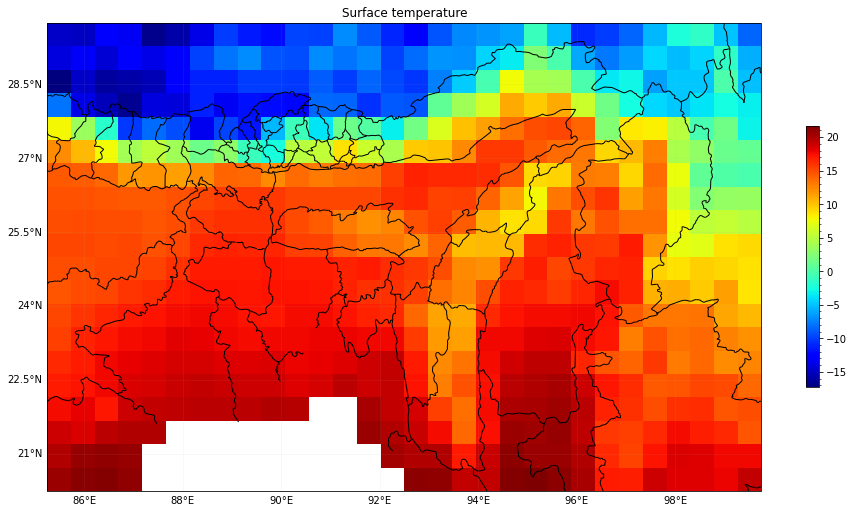

In [26]:
fig = plt.figure(figsize=(16, 16)) #open figure with size you need

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #adding project within the opened figure

# here where magic happen
mp = ax.imshow(im_data-0,extent=(x.min(),x.max(), y.min(), y.max()),cmap='jet', origin='lower')


plt.title('Surface temperature', fontsize=12)


#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAKES, alpha=0.5)
#ax.add_feature(cfeature.RIVERS)


# adding colorbar and adjust the size
cbar = fig.colorbar(mp, shrink=0.3)
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

plt.savefig("CRU_test.jpg",dpi=330)